In [2]:

! pip install pillow
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


(-0.5, 365.5, 356.5, -0.5)

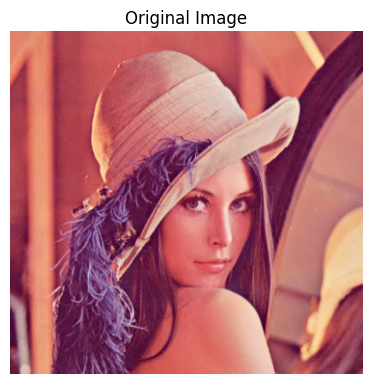

In [9]:
import matplotlib.pyplot as plt
from PIL import Image

image_path = "/content/drive/MyDrive/AI and Machine learning/unnamed1.png"
image = Image.open(image_path)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

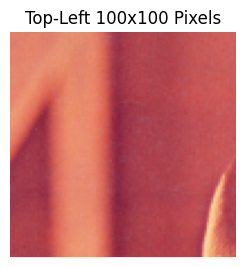

In [10]:
import numpy as np

image_array = np.array(image)
top_left = image_array[:100, :100]  # top-left 100x100 pixels

plt.subplot(1, 2, 2)
plt.imshow(top_left)
plt.title("Top-Left 100x100 Pixels")
plt.axis("off")
plt.show()

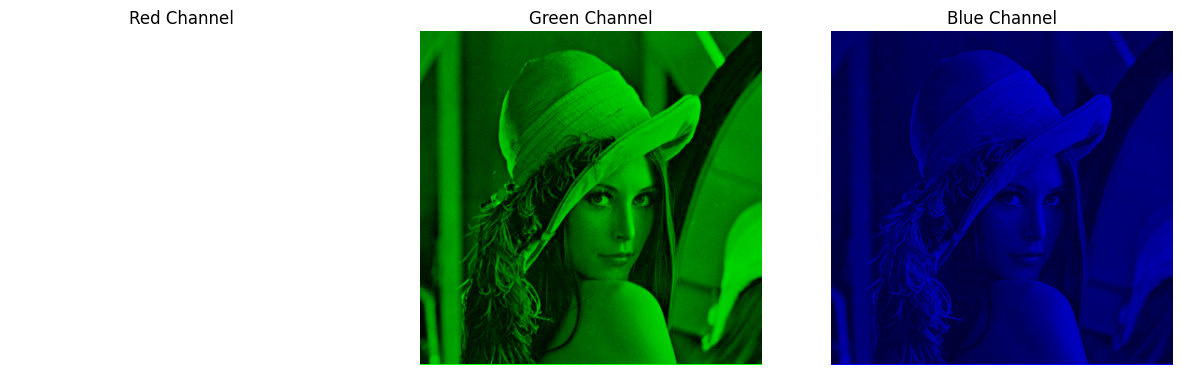

In [11]:
# 3. Show the three color channels (R, G, B)
r_channel = image_array.copy()
g_channel = image_array.copy()
b_channel = image_array.copy()

# Keep only one channel, setting others to 0
r_channel[:, :, 1:] = 0  # Keep Red, remove Green & Blue
g_channel[:, :, [0, 2]] = 0  # Keep Green, remove Red & Blue
b_channel[:, :, :2] = 0  # Keep Blue, remove Red & Green

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(r_channel)
plt.title("Red Channel")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(g_channel)
plt.title("Green Channel")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(b_channel)
plt.title("Blue Channel")
plt.axis("off")
plt.show()

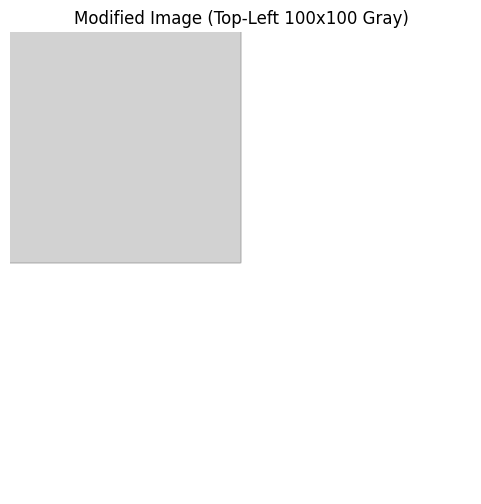

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Example if your image is RGBA (has 4 channels):
image_array = np.zeros((200, 200, 4), dtype=np.uint8) # Example RGBA image
modified_image = image_array.copy()
modified_image[:100, :100] = [210, 210, 210, 255]  # light gray, fully opaque (RGBA)


plt.figure(figsize=(6, 6))
plt.imshow(modified_image)
plt.title("Modified Image (Top-Left 100x100 Gray)")
plt.axis("off")
plt.show()

In [13]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


(-0.5, 219.5, 324.5, -0.5)

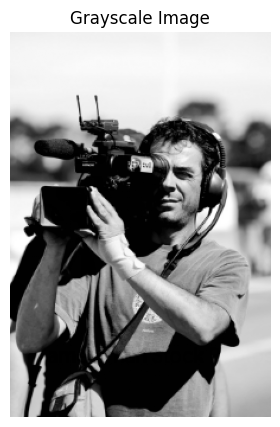

In [15]:
image_path = "/content/drive/MyDrive/AI and Machine learning/unnamed.png"
gray_image = Image.open(image_path).convert("L")  # Convert to grayscale

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap="gray")  # Display grayscale image
plt.title("Grayscale Image")
plt.axis("off")

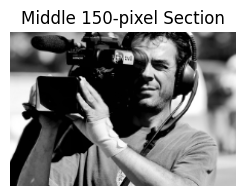

In [16]:

gray_array = np.array(gray_image)
height, width = gray_array.shape

start_y = height // 2 - 75  #start position
end_y = start_y + 150
cropped_image = gray_array[start_y:end_y, :]  #middle 150-pixel sected
plt.subplot(1, 2, 2)
plt.imshow(cropped_image, cmap="gray")
plt.title("Middle 150-pixel Section")
plt.axis("off")
plt.show()

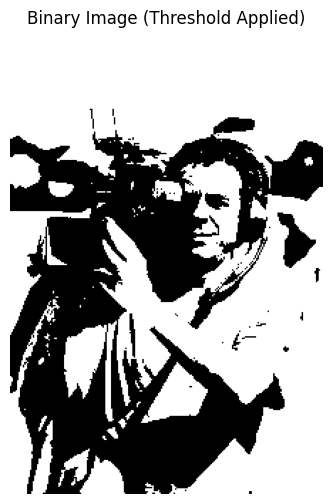

In [17]:
binary_image = np.where(gray_array < 100, 0, 255).astype(np.uint8)  # pixels <100 to 0, others to 255

plt.figure(figsize=(6, 6))
plt.imshow(binary_image, cmap="gray")
plt.title("Binary Image (Threshold Applied)")
plt.axis("off")
plt.show()

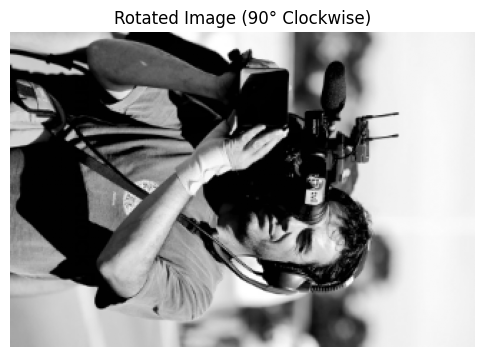

In [18]:

rotated_image = np.rot90(gray_array, k=3)

plt.figure(figsize=(6, 6))
plt.imshow(rotated_image, cmap="gray")
plt.title("Rotated Image (90° Clockwise)")
plt.axis("off")
plt.show()

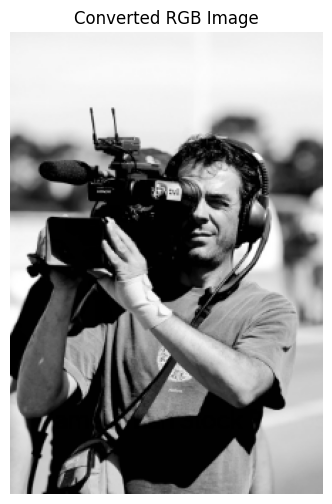

In [19]:
rgb_image = np.stack([gray_array] * 3, axis=-1)  # Replicate grayscale values across R, G, B channels

plt.figure(figsize=(6, 6))
plt.imshow(rgb_image)
plt.title("Converted RGB Image")
plt.axis("off")
plt.show()

In [22]:
image_path = "/content/drive/MyDrive/AI and Machine learning/unnamed.png"
image = Image.open(image_path).convert("L")
image_array = np.array(image, dtype=np.float32)

mean_image = np.mean(image_array, axis=0)
centered_data = image_array - mean_image

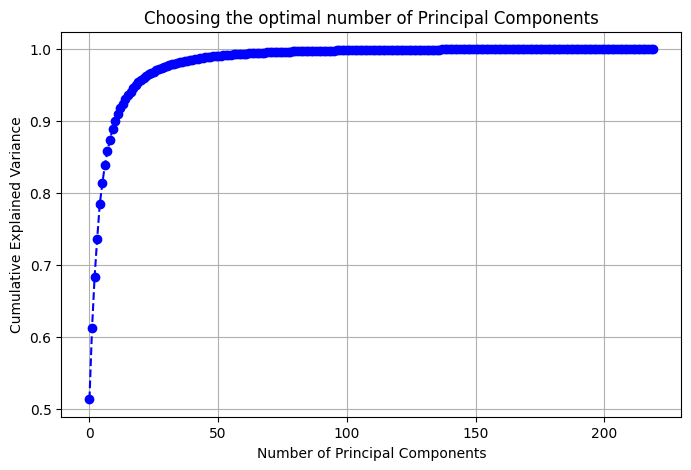

In [23]:

#Calc Cov Matrix
cov_matrix = np.cov(centered_data, rowvar=False)

#Eigen Decomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

#Sorting Eigenvalues & Eigenvectors in Desc Order
sorted_indices = np.argsort(eigenvalues)[::-1]  #Desc order
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

#Sum
explained_variance_ratio = np.cumsum(eigenvalues) / np.sum(eigenvalues)

plt.figure(figsize=(8, 5))
plt.plot(explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Choosing the optimal number of Principal Components")
plt.grid()
plt.show()

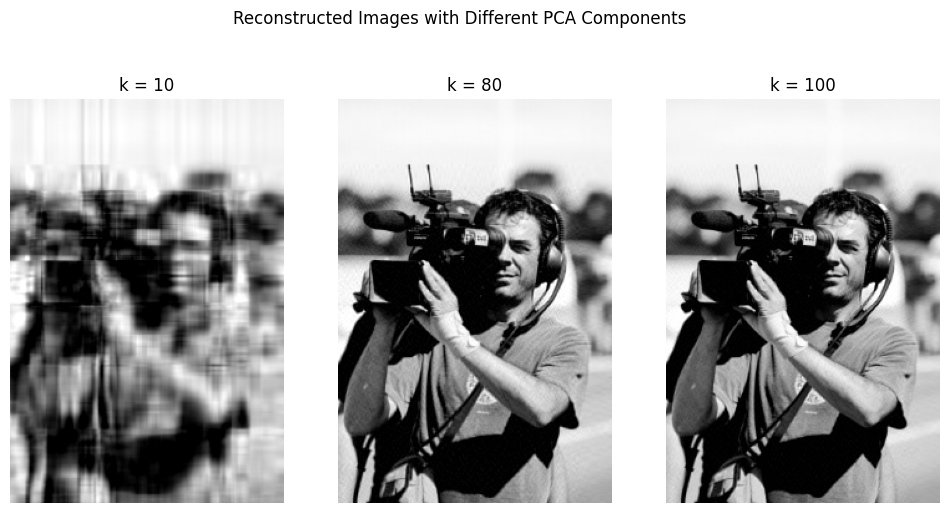

In [24]:
def reconstruct_image(k):
    top_k_eigenvectors = eigenvectors[:, :k]
    transformed_data = np.dot(centered_data, top_k_eigenvectors)
    reconstructed_data = np.dot(transformed_data, top_k_eigenvectors.T) + mean_image
    return np.clip(reconstructed_data, 0, 255)


k_values = [10, 80, 100]

plt.figure(figsize=(12, 6))
for i, k in enumerate(k_values):
    reconstructed_image = reconstruct_image(k)

    plt.subplot(1, 3, i+1)
    plt.imshow(reconstructed_image, cmap="gray")
    plt.title(f"k = {k}")
    plt.axis("off")

plt.suptitle("Reconstructed Images with Different PCA Components")
plt.show()